In [1]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Dataset BRUT

In [2]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [3]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [4]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
47,10.395157,11.272629,11.561127,11.579086,9.846878,10.122208,8.436691,5.664215,4.931580,4.051712,...,11.736267,12.358734,15.550217,15.529861,14.483612,14.436890,14.567383,0,0,1
457,0.334717,-0.259048,-0.784576,-2.732254,-1.162857,0.412521,0.155151,0.327530,0.052200,1.380981,...,13.512741,14.615280,9.298950,10.142899,9.496460,18.091660,12.863922,0,0,1
319,0.249725,1.409714,0.392181,0.198242,3.376556,1.652725,4.542526,4.815460,1.440842,5.546890,...,11.677597,13.868286,16.036224,14.855896,22.808228,13.152420,19.461151,0,0,1
217,0.077347,-0.403900,-0.533188,-0.441010,0.033051,-0.526001,-1.073074,-0.099838,-3.880280,0.200638,...,9.858002,11.207138,10.792938,10.233887,9.898697,11.429794,12.331207,0,0,1
410,-0.940201,-1.404678,-1.252640,-0.256653,1.576111,3.969116,3.019821,3.084457,4.037354,7.124680,...,10.379929,13.474442,11.863159,10.610977,9.206757,10.396698,9.043961,0,0,1
221,-0.013641,-1.118561,-0.549942,-1.137711,0.229370,-1.596207,-0.321289,-1.433395,0.213806,-1.232285,...,11.277771,11.134109,12.799271,12.164795,11.693161,12.017563,12.166016,0,0,1
155,-5.795639,-7.156738,-8.911697,-8.203003,-11.626709,-11.074844,-4.962448,-3.525940,0.169510,-5.692688,...,-12.953964,-9.021469,-13.207748,-11.892120,-11.264847,-11.929230,-17.246750,1,0,0
240,0.204239,-0.158493,0.414917,0.244934,0.248520,-0.535568,0.015091,-0.048355,0.341904,0.508301,...,14.300430,12.713104,14.086166,13.916168,13.389450,13.874283,14.278885,0,0,1
285,-0.388336,-0.039978,0.078537,0.384995,1.578506,0.493927,3.825470,2.416473,0.262894,-0.105820,...,8.522034,15.909348,10.488876,5.619049,4.213669,3.892853,8.584274,0,0,1
374,0.352676,0.408936,1.759262,-1.158066,-2.854355,-2.531143,1.106842,-0.935410,1.420486,3.611176,...,9.737091,11.531540,9.254654,8.506470,5.270706,5.370056,6.840118,0,0,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
190,0.863831,-0.195602,-0.399109,0.358658,0.040237,-0.081879,-1.027588,-0.533188,0.364639,0.232956,...,14.655975,11.083832,12.217484,9.552750,9.591049,10.622940,11.433395,0,0,1
160,-3.096176,-3.079422,-1.128143,0.016281,-0.609802,-0.500854,-0.950974,-0.274612,-1.838028,-1.969696,...,9.812515,13.768921,13.444519,9.722717,6.903564,7.370422,7.153748,1,0,0
3,0.073746,-0.011246,-0.050751,0.015091,-0.114197,0.004318,-0.012436,-0.044769,0.356262,0.355072,...,14.497955,14.603302,13.281708,13.818008,13.615707,12.161224,12.683167,0,0,1
327,1.731735,2.299164,1.720963,1.753281,0.729767,1.215790,1.063751,-0.097443,1.922073,1.263672,...,12.980042,13.444504,13.129684,13.024323,13.061432,12.719070,13.110519,0,0,1
71,1.962769,-1.636902,1.312744,0.521469,0.568146,0.062973,0.125229,-0.078278,-0.510437,-2.143280,...,15.341919,12.618515,12.508392,12.453308,12.468872,13.485214,14.687103,0,0,1
514,0.034241,-0.494873,-0.215942,-0.249466,-0.089050,-1.444168,-1.970901,-1.220322,-0.002869,-0.067505,...,12.874695,12.300079,12.992020,14.533875,14.102936,11.433380,10.454147,0,0,1
163,-2.501221,-4.697891,-8.254486,-7.768463,-9.589249,-8.820709,-8.295181,-12.172592,-13.840149,-7.259689,...,-10.741730,-17.531662,-19.360855,-10.663910,-12.253647,-10.386169,-12.526581,1,0,0
409,0.255707,1.039810,1.032623,0.398163,0.053391,-1.035965,-1.879913,-4.308838,-5.167160,-3.252991,...,-21.360001,-13.316681,-5.038727,-9.458420,-10.162308,-5.304474,-7.423355,0,0,1
417,1.494705,1.414505,2.135162,-1.531570,-1.938583,-4.252579,-3.786896,-2.367142,-3.332001,-8.724945,...,-7.073807,-12.903671,-7.192307,-6.932541,-8.467224,-9.339905,-8.218231,0,0,1
67,0.292816,0.252121,0.218597,0.346695,0.085724,0.016281,0.297607,-0.209961,-0.226730,1.977142,...,-13.921204,-13.101196,-14.276749,-10.742905,-7.029510,-4.806488,-9.843872,0,0,1


,Action
47,S'assoir (depuis position allongée)
457,Marcher
319,Courrir
217,Se lever (chaise)
410,S'allonger (depuis position assise)
221,Se lever (chaise)
155,Marcher
240,Se lever (chaise)
285,S'allonger (depuis position debout)
374,Se lever (depuis position allongée)


,Action
190,S'assoir (chaise)
160,Marcher
3,S'assoir (chaise)
327,Ne rien faire
71,Marcher
514,Marcher
163,Marcher
409,S'allonger (depuis position assise)
417,S'allonger (depuis position assise)
67,S'allonger (depuis position assise)


In [5]:
# Configuration des paramètres que l'on souhaite tester
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'n_neighbors': np.array(range (1,100))#,
   # 'weights':['uniform','distance'],
   # 'p':[1,2],
   # 'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]
scores = ['accuracy']

warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .......................................... n_neighbors=2 -   0.0s
[CV] n_neighbors=2 ...........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ......................................... n_neighbors=12 -   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......................................... n_neighbors=13 -   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......................................... n_neighbors=13 -   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......................................... n_neighbors=13 -   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......................................... n_neighbors=13 -   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ......................................... n_neighbors=13 -   0.0s
[CV] n_neighbors=14 ..................................................
[CV] ......................................... n_neighbors=14 -   0.0s
[CV] n_neighbors=14 ..................................................
[CV] 

[CV] n_neighbors=36 ..................................................
[CV] ......................................... n_neighbors=36 -   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ......................................... n_neighbors=36 -   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......................................... n_neighbors=37 -   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......................................... n_neighbors=37 -   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......................................... n_neighbors=37 -   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......................................... n_neighbors=37 -   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......................................... n_neighbors=37 -   0.0s
[CV] n

[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......................................... n_neighbors=49 -   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......................................... n_neighbors=49 -   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......................................... n_neighbors=49 -   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......................................... n_neighbors=49 -   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......................................... n_neighbors=49 -   0.0s
[CV] n

[CV] ......................................... n_neighbors=60 -   0.0s
[CV] n_neighbors=61 ..................................................
[CV] ......................................... n_neighbors=61 -   0.0s
[CV] n_neighbors=61 ..................................................
[CV] ......................................... n_neighbors=61 -   0.0s
[CV] n_neighbors=61 ..................................................
[CV] ......................................... n_neighbors=61 -   0.0s
[CV] n_neighbors=61 ..................................................
[CV] ......................................... n_neighbors=61 -   0.0s
[CV] n_neighbors=61 ..................................................
[CV] ......................................... n_neighbors=61 -   0.0s
[CV] n_neighbors=62 ..................................................
[CV] ......................................... n_neighbors=62 -   0.0s
[CV] n_neighbors=62 ..................................................
[CV] .

[CV] n_neighbors=81 ..................................................
[CV] ......................................... n_neighbors=81 -   0.0s
[CV] n_neighbors=82 ..................................................
[CV] ......................................... n_neighbors=82 -   0.0s
[CV] n_neighbors=82 ..................................................
[CV] ......................................... n_neighbors=82 -   0.0s
[CV] n_neighbors=82 ..................................................
[CV] ......................................... n_neighbors=82 -   0.0s
[CV] n_neighbors=82 ..................................................
[CV] ......................................... n_neighbors=82 -   0.0s
[CV] n_neighbors=82 ..................................................
[CV] ......................................... n_neighbors=82 -   0.0s
[CV] n_neighbors=83 ..................................................
[CV] ......................................... n_neighbors=83 -   0.0s
[CV] n

[CV] ......................................... n_neighbors=96 -   0.0s
[CV] n_neighbors=96 ..................................................
[CV] ......................................... n_neighbors=96 -   0.0s
[CV] n_neighbors=97 ..................................................
[CV] ......................................... n_neighbors=97 -   0.0s
[CV] n_neighbors=97 ..................................................
[CV] ......................................... n_neighbors=97 -   0.0s
[CV] n_neighbors=97 ..................................................
[CV] ......................................... n_neighbors=97 -   0.0s
[CV] n_neighbors=97 ..................................................
[CV] ......................................... n_neighbors=97 -   0.0s
[CV] n_neighbors=97 ..................................................
[CV] ......................................... n_neighbors=97 -   0.0s
[CV] n_neighbors=98 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    1.7s finished


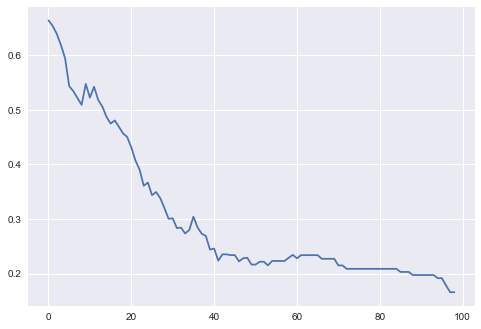

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

# Récupération de tout les scores
scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

plt.plot(scores);

In [7]:
# warnings.filterwarnings('ignore')

clf_demo = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

clf_demo.fit(source_train, cible_train.values.ravel())


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [8]:
warnings.filterwarnings('ignore')

for i in range(0,20):
    print("prédit : ", clf_demo.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Marcher']
prédit :  ['Ne rien faire'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Ne rien faire'] 
 attendu :  ['Marcher']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ['Se lever (chaise)']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  [

# Dataset ANALYSE

In [9]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed


In [10]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [11]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,min_x,min_y,min_z,min_t,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_t,ecart_type_xyz
346,0.733353,0.879395,0.683075,0.832718,0.720184,0.867432,0.704620,0.801590,0.770462,0.799194,...,0.683075,4.796570,8.400620,14.007156,0.683075,0.053263,0.051163,0.062078,0.072890,3.210228
130,0.528641,-0.297348,-0.735489,-1.571060,-1.063492,-2.082230,-1.336441,-2.189972,-2.841187,-3.309265,...,-3.596558,2.367645,5.980087,7.895966,-3.596558,1.447688,1.281660,2.406855,1.854702,4.350036
91,0.137192,0.102478,0.113251,0.158737,0.141983,0.122833,0.120438,0.156342,0.141983,0.118042,...,0.098892,0.170975,9.828766,10.111786,0.098892,0.017233,0.015218,0.020348,0.029319,4.613041
271,0.904541,0.440063,0.429291,1.272049,-0.099838,0.437668,0.956009,-2.734650,-0.411072,-1.457336,...,-2.734650,2.988937,-4.888397,2.957916,-4.888397,1.269066,2.215458,4.341326,3.081343,4.158640
341,1.110443,0.607651,1.041000,0.636383,0.912918,0.628006,1.030228,0.854263,0.759689,0.839890,...,0.607651,4.716354,8.351532,13.993973,0.607651,0.137585,0.100630,0.105236,0.124118,3.181324
451,1.112839,0.898544,0.223389,-0.815704,0.010300,-1.313690,0.724976,-5.653183,3.630341,-3.958084,...,-5.653183,-2.154404,-7.772812,-7.358704,-7.772812,2.294565,7.726116,10.912639,16.678822,8.336780
112,-6.674301,-3.750992,-13.836563,-36.761047,2.531403,0.112061,4.011017,2.536179,-1.041946,-25.539413,...,-36.761047,-16.714142,-2.923950,-46.754105,-36.761047,10.945432,4.996547,3.617687,13.821731,8.393619
542,0.702225,0.583710,1.043396,1.207397,1.510269,0.918900,-0.979706,-1.454956,-2.841187,-3.545090,...,-11.933167,0.062027,-3.414764,-10.460388,-11.933167,4.929393,3.386180,1.903283,9.445703,5.595693
147,-12.429962,-26.886154,-30.141083,-23.879044,-39.862732,-39.862732,-22.086975,2.574493,1.382187,3.472321,...,-39.862732,-38.746780,-5.102676,-69.519363,-39.862732,15.565917,14.714521,10.942583,23.490521,17.024132
391,-9.012253,-8.809937,-8.955978,-8.964355,-9.109207,-10.613968,-10.980286,-10.177032,-10.297928,-5.800430,...,-10.980286,-0.230057,-4.811783,-13.726074,-10.980286,4.477989,2.673688,5.571775,11.664126,5.973051


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,min_x,min_y,min_z,min_t,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_t,ecart_type_xyz
18,0.369431,0.180298,0.278458,0.258102,0.296402,0.339508,0.045013,-0.010056,0.125229,0.720184,...,-1.677612,4.044785,4.323288,8.493301,-1.677612,0.636340,1.341643,2.486080,2.970957,3.637965
203,0.120438,1.173889,-0.065109,-0.162079,0.007904,0.045013,-1.008423,-0.995270,0.249725,1.465973,...,-1.696762,7.095001,2.294205,11.712311,-1.696762,0.755834,0.925412,1.245430,0.905637,3.842875
33,9.785828,10.184464,11.537186,9.399170,8.394791,11.680832,13.404663,12.061523,10.727951,5.786316,...,0.151566,-4.192459,-3.577576,5.158173,-4.192459,4.540643,4.759001,5.878147,7.406605,5.262250
530,8.358887,11.200806,21.062515,20.843445,38.250488,-6.992737,-4.970840,35.036270,-12.719666,31.541946,...,-12.719666,-32.682266,-11.140854,-37.359253,-32.682266,15.174031,19.481359,10.986103,35.062476,16.682977
234,-0.057938,-0.725922,-0.367981,-0.565506,-0.468536,-1.023987,-1.209549,-0.214752,-1.025192,-0.473328,...,-1.519592,8.476456,2.093094,10.072281,-1.519592,0.817424,0.385475,1.149713,1.490887,3.976715
187,-0.667252,-0.305725,-1.602188,-0.109406,-2.450943,0.013901,-0.964142,-3.970062,-2.239044,0.384995,...,-3.970062,6.622147,0.408768,9.531204,-3.970062,1.294026,0.921118,2.382718,1.377375,4.198044
246,-0.291367,-0.716339,-1.381927,-0.777390,-0.199188,0.054596,-0.658875,4.307892,2.424850,-3.012375,...,-4.910980,-4.291824,-1.554474,-6.702698,-4.910980,2.680009,5.590666,5.455506,9.531089,5.780984
486,1.033829,0.651947,0.845886,1.467178,1.908905,2.613998,2.195007,1.109238,-1.915833,-2.966888,...,-15.051620,-1.816223,-7.328094,-19.924667,-15.051620,5.828719,4.041247,3.074275,12.273138,5.969203
390,-9.418060,-10.822266,-10.045349,-8.900909,-8.866196,-10.240479,-11.527359,-10.915634,-11.366943,-8.025833,...,-11.527359,-1.179367,-4.233582,-16.940308,-11.527359,4.729126,2.896256,4.654186,11.159452,6.010870
510,0.442459,0.420914,-0.712753,-0.012436,0.942841,-0.452972,0.311966,-2.116943,-5.120468,-3.285309,...,-7.552979,-5.420685,-6.802567,-8.713837,-7.552979,2.433544,9.596158,10.818563,17.350247,9.306453


,Action
346,Ne rien faire
130,S'assoir (chaise)
91,Ne rien faire
271,S'allonger (depuis position debout)
341,Ne rien faire
451,Sauter
112,Sauter
542,S'allonger (depuis position assise)
147,Sauter
391,Se lever (depuis position allongée)


,Action
18,S'assoir (chaise)
203,S'assoir (chaise)
33,Se lever (depuis position allongée)
530,Courrir
234,Se lever (chaise)
187,S'assoir (chaise)
246,Sauter
486,S'allonger (depuis position assise)
390,Se lever (depuis position allongée)
510,Sauter


In [35]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'n_neighbors': [1],
    'weights':['uniform'],
    'p':[1],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]
scores = ['accuracy']

"""
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')
"""
warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform ........
[CV]  algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform ..........
[CV] . algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform -   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, p=1,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


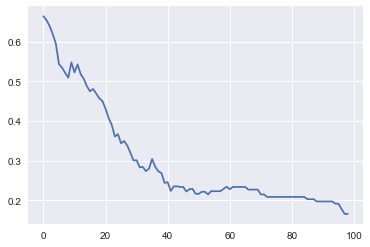

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

# Récupération de tout les scores
scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

plt.plot(scores);

In [23]:
# TODO copier coller le best classifier
clf_analysed_demo = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

clf_analysed_demo.fit(source_train_analysed, cible_train_analysed.values.ravel())



KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [26]:

for i in range(0,20):
    print("prédit : ", clf_analysed_demo.predict(source_test_analysed.values[i]),"\n attendu : ",cible_test_analysed.values[i])


prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depui


# Dataset ANALYSE 2

In [16]:

# Récupération des données analysé sans les données brutes (DONNEES ANALYSEES 2)
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2


In [17]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2 = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)


In [18]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
119,0,1,0,-3.426288,24.529663,-35.971802,16.902233
372,0,0,1,11.215334,29.198364,1.787140,5.043799
207,0,0,1,12.178101,16.631195,7.760681,2.103415
136,0,0,1,-24.341317,4.226837,-77.403473,23.357834
556,0,0,1,11.862425,19.936401,6.898773,3.037253
5,0,0,1,14.374599,22.492203,10.024414,2.933101
140,0,0,1,-17.876012,14.083771,-38.917877,19.039346
134,0,0,1,-25.288880,17.048996,-82.912521,24.375392
276,0,0,1,9.446797,23.516922,1.302322,4.639115
194,0,0,1,11.921324,15.748917,7.190857,1.913885


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
481,0,0,1,12.653709,17.135162,8.421478,2.468941
362,0,0,1,12.555127,23.692886,-1.636566,6.094235
186,0,0,1,12.712548,18.267639,6.763504,2.254441
286,0,0,1,11.266448,21.508179,3.897644,4.936138
423,0,0,1,10.446434,19.890900,2.914810,3.343412
285,0,0,1,11.450383,19.237289,3.892853,4.054031
406,0,0,1,11.765099,16.683853,4.226837,2.885984
125,0,1,0,1.923731,27.988083,-27.684280,17.546981
348,0,0,1,13.013319,13.861115,12.330032,0.380551
359,0,0,1,12.979560,18.893707,8.696808,2.147860


,Action
119,Courrir
372,Se lever (depuis position allongée)
207,Se lever (chaise)
136,Sauter
556,S'assoir (depuis position allongée)
5,Se lever (chaise)
140,Sauter
134,Sauter
276,S'allonger (depuis position debout)
194,S'assoir (chaise)


,Action
481,S'allonger (depuis position assise)
362,Se lever (depuis position allongée)
186,S'assoir (chaise)
286,S'allonger (depuis position debout)
423,S'allonger (depuis position assise)
285,S'allonger (depuis position debout)
406,S'allonger (depuis position assise)
125,Courrir
348,Ne rien faire
359,Se lever (depuis position allongée)


In [19]:
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'n_neighbors': np.array(range (1,100))#,
   # 'weights':['uniform','distance'],
    #'p':[1,2],
   # 'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]
scores = ['accuracy']

warnings.filterwarnings('ignore')


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed_2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed_2.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed_2.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed_2.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed_2, cible_pred_analysed_2 = cible_test_analysed_2, clf_analysed_2.predict(source_test_analysed_2)
    print(classification_report(cible_true_analysed_2, cible_pred_analysed_2))
    
    
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .......................................... n_neighbors=2 -   0.0s
[CV] n_neighbors=2 ...........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................................... n_neighbors=16 -   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ......................................... n_neighbors=16 -   0.0s
[CV] n_neighbors=17 ..................................................
[CV] ......................................... n_neighbors=17 -   0.0s
[CV] n_neighbors=17 ..................................................
[CV] ......................................... n_neighbors=17 -   0.0s
[CV] n_neighbors=17 ..................................................
[CV] ......................................... n_neighbors=17 -   0.0s
[CV] n_neighbors=17 ..................................................
[CV] ......................................... n_neighbors=17 -   0.0s
[CV] n_neighbors=17 ..................................................
[CV] ......................................... n_neighbors=17 -   0.0s
[CV] n_neighbors=18 ..................................................
[CV] .

[CV] ......................................... n_neighbors=32 -   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ......................................... n_neighbors=32 -   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ......................................... n_neighbors=32 -   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ......................................... n_neighbors=32 -   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ......................................... n_neighbors=32 -   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......................................... n_neighbors=33 -   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ......................................... n_neighbors=33 -   0.0s
[CV] n_neighbors=33 ..................................................
[CV] .

[CV] n_neighbors=47 ..................................................
[CV] ......................................... n_neighbors=47 -   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......................................... n_neighbors=48 -   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......................................... n_neighbors=49 -   0.0s
[CV] n

[CV] n_neighbors=63 ..................................................
[CV] ......................................... n_neighbors=63 -   0.0s
[CV] n_neighbors=63 ..................................................
[CV] ......................................... n_neighbors=63 -   0.0s
[CV] n_neighbors=63 ..................................................
[CV] ......................................... n_neighbors=63 -   0.0s
[CV] n_neighbors=63 ..................................................
[CV] ......................................... n_neighbors=63 -   0.0s
[CV] n_neighbors=64 ..................................................
[CV] ......................................... n_neighbors=64 -   0.0s
[CV] n_neighbors=64 ..................................................
[CV] ......................................... n_neighbors=64 -   0.0s
[CV] n_neighbors=64 ..................................................
[CV] ......................................... n_neighbors=64 -   0.0s
[CV] n

[CV] n_neighbors=77 ..................................................
[CV] ......................................... n_neighbors=77 -   0.0s
[CV] n_neighbors=77 ..................................................
[CV] ......................................... n_neighbors=77 -   0.0s
[CV] n_neighbors=78 ..................................................
[CV] ......................................... n_neighbors=78 -   0.0s
[CV] n_neighbors=78 ..................................................
[CV] ......................................... n_neighbors=78 -   0.0s
[CV] n_neighbors=78 ..................................................
[CV] ......................................... n_neighbors=78 -   0.0s
[CV] n_neighbors=78 ..................................................
[CV] ......................................... n_neighbors=78 -   0.0s
[CV] n_neighbors=78 ..................................................
[CV] ......................................... n_neighbors=78 -   0.0s
[CV] n

[CV] n_neighbors=91 ..................................................
[CV] ......................................... n_neighbors=91 -   0.0s
[CV] n_neighbors=91 ..................................................
[CV] ......................................... n_neighbors=91 -   0.0s
[CV] n_neighbors=92 ..................................................
[CV] ......................................... n_neighbors=92 -   0.0s
[CV] n_neighbors=92 ..................................................
[CV] ......................................... n_neighbors=92 -   0.0s
[CV] n_neighbors=92 ..................................................
[CV] ......................................... n_neighbors=92 -   0.0s
[CV] n_neighbors=92 ..................................................
[CV] ......................................... n_neighbors=92 -   0.0s
[CV] n_neighbors=92 ..................................................
[CV] ......................................... n_neighbors=92 -   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    1.3s finished


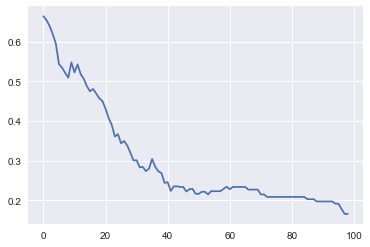

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

# Récupération de tout les scores
scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

plt.plot(scores);

In [21]:
# TODO copier coller le best classifier
#clf_analysed_2_demo = 

#clf_analysed_2_demo.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())



In [22]:

#for i in range(0,20):
#    print("prédit : ", clf_analysed_2_demo.predict(source_test_analysed_2.values[i]),"\n attendu : ",cible_test_analysed_2.values[i])
